# Population-level ablations check

While I checked the logits post-ablation for a few examples, I wanted to run it on a subsample of the full dataset for rigor.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import os
import logging
import json
import random

import numpy as np
import json
from tqdm.notebook import tqdm

import pandas as pd


In [2]:
# Load imagenet


# Path to your imagenet_class.json file
json_file_path = '/home/mila/s/sonia.joseph/ViT-Planetarium/my_draft/test_nbs/imagenet_class_index.json'
imagenet_path = '/network/datasets/imagenet.var/imagenet_torchvision/val/'

# Load the JSON file into a Python dictionary
with open(json_file_path, 'r') as file:
    num_to_word_dict = json.load(file)

# Create a reverse dictionary for word to number mapping
word_to_num_dict = {}
for num, words in num_to_word_dict.items():
    for word in words:  # Assuming each entry in num_to_word_dict is a list of words
        word_to_num_dict[word] = num

# Function to get the class name from a label
def get_class_name(label):
    # Assuming the label maps to a list of class names
    return num_to_word_dict.get(str(label), ["Unknown label"])[1]

# Function to get the label from a class name
def get_label(class_name):
    return word_to_num_dict.get(class_name, "Unknown class name")

# Get class names
imagenet_class_nums = np.arange(0, 1000, 1)
imagenet_class_names = ["{}".format(get_class_name(i)) for i in imagenet_class_nums]

# Set the seed. You don't need indices if data is loaded in same order every time.
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to load images based on saved order
def load_images_in_order(indices_path, imagenet_dataset):
    indices = np.load(indices_path)
    subset_dataset = Subset(imagenet_dataset, indices)
    data_loader = DataLoader(subset_dataset, batch_size=1)
    return data_loader

# Load the ImageNet dataset
batch_size = 1
imagenet_data = datasets.ImageFolder(imagenet_path, transform=data_transforms)
data_loader = load_images_in_order('imagenet_sample_indices.npy', imagenet_data)
len(data_loader)

500

# Mean-ablations

Construct a cup concept class from the ImageNet-1k hierarchy. Do vessel + beverage + glass + container. This is imperfect but a good starting piont.


Classification based on wordnet hierarchy https://observablehq.com/@mbostock/imagenet-hierarchy




In [3]:
# Construct a cup class
# Do vessel + beverage + glass + container
# Based on this https://observablehq.com/@mbostock/imagenet-hierarchy


cup_classes = [
    "measuring_cup",
    "coffee_mug",
    "water_jug",
    "whiskey_jug",
    "beer_bottle",
    "pill_bottle",
    "pop_bottle",
    "water_bottle",
    "wine_bottle",
    "washbasin",
    "beaker",
    "vase",
    "cauldron",
    "coffeepot",
    "teapot",
    "barrel",
    "bathtub",
    "bucket",
    "ladle",
    "mortar",
    "pitcher",
    "tub",
    "mixing_bowl",
    "soup_bowl",
    "Petri dish",
    "milk_can",
    "beer_glass",
    "goblet",
    "cocktail_shaker",
    "saltshaker",
    "pot",
    "thimble",
    "hot_pot",
    "trifle",
    "consomme",
    "espresso",
    "red_wine",
    "cup",
    "eggnog"
]


In [4]:
def is_match(imagenet_class, target_classes):
    words = imagenet_class.split()
    for target in target_classes:
        target_words = target.split()
        if all(word in words for word in target_words):
            return True
    return False
matching_classes = [cls for cls in imagenet_class_names if is_match(cls, cup_classes)]


In [5]:
dog_classes = [
    "chihuahua",
    "japanese_spaniel",
    "maltese_dog",
    "pekinese",
    "shih-tzu",
    "blenheim_spaniel",
    "papillon",
    "toy_terrier",
    "rhodesian_ridgeback",
    "afghan_hound",
    "basset",
    "beagle",
    "bloodhound",
    "bluetick",
    "black-and-tan_coonhound",
    "walker_hound",
    "english_foxhound",
    "redbone",
    "borzoi",
    "irish_wolfhound",
    "italian_greyhound",
    "whippet",
    "ibizan_hound",
    "norwegian_elkhound",
    "otterhound",
    "saluki",
    "scottish_deerhound",
    "weimaraner",
    "staffordshire_bullterrier",
    "american_staffordshire_terrier",
    "bedlington_terrier",
    "border_terrier",
    "kerry_blue_terrier",
    "irish_terrier",
    "norfolk_terrier",
    "norwich_terrier",
    "yorkshire_terrier",
    "wire-haired_fox_terrier",
    "lakeland_terrier",
    "sealyham_terrier",
    "airedale",
    "cairn",
    "australian_terrier",
    "dandie_dinmont",
    "boston_bull",
    "miniature_schnauzer",
    "giant_schnauzer",
    "standard_schnauzer",
    "scotch_terrier",
    "tibetan_terrier",
    "silky_terrier",
    "soft-coated_wheaten_terrier",
    "west_highland_white_terrier",
    "lhasa",
    "flat-coated_retriever",
    "curly-coated_retriever",
    "golden_retriever",
    "labrador_retriever",
    "chesapeake_bay_retriever",
    "german_short-haired_pointer",
    "vizsla",
    "english_setter",
    "irish_setter",
    "gordon_setter",
    "brittany_spaniel",
    "clumber",
    "english_springer",
    "welsh_springer_spaniel",
    "cocker_spaniel",
    "sussex_spaniel",
    "irish_water_spaniel",
    "kuvasz",
    "schipperke",
    "groenendael",
    "malinois",
    "briard",
    "kelpie",
    "komondor",
    "old_english_sheepdog",
    "shetland_sheepdog",
    "collie",
    "border_collie",
    "bouvier_des_flandres",
    "rottweiler",
    "german_shepherd",
    "doberman",
    "miniature_pinscher",
    "greater_swiss_mountain_dog",
    "bernese_mountain_dog",
    "appenzeller",
    "entlebucher",
    "boxer",
    "bull_mastiff",
    "tibetan_mastiff",
    "french_bulldog",
    "great_dane",
    "saint_bernard",
    "eskimo_dog",
    "malamute",
    "siberian_husky"
]


In [6]:
matching_classes = [cls for cls in imagenet_class_names if is_match(cls, dog_classes)]


In [7]:
# Get average of dog neurons from cached activations
def load_cached_act(layer_num, save_path = '/network/scratch/s/sonia.joseph/clip_mechinterp/tinyclip/mini_dataset/'):
    """
    Load cached activations and calculate per-neuron z-scores.
    """

    file_name = f'mlp_fc1_{layer_num}.npz'
    loaded = pd.read_parquet(os.path.join(save_path, file_name))

    return loaded
    
    
layer_num = 7
loaded = load_cached_act(layer_num)

In [8]:
# Take loaded dataset and calculate average activation_value per neuron of all dog-classes

avg_dog_activation = loaded[loaded['class_name'].isin(dog_classes)].groupby('neuron_idx')['activation_value'].mean()
avg_dog_activation

avg_cup_activation = loaded[loaded['class_name'].isin(cup_classes)].groupby('neuron_idx')['activation_value'].mean()

In [9]:
print(avg_cup_activation.iloc[128])
print(avg_dog_activation.iloc[128])

-0.5700862557415344
-1.5201441726844929


In [10]:
# Load CLIP model
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M")
processor = CLIPProcessor.from_pretrained("wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M", do_rescale=False) # Make sure the do_rescale is false for pytorch datasets


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [11]:
import copy

def create_custom_hook(neuron_idx, new_value):
    # This is the actual hook function
    def custom_forward_hook(module, input, output):
        # Modify the output for the specified neuron
        output[:, :, neuron_idx] = new_value
        return output
    return custom_forward_hook

# Specify the neuron index and the new value
neuron_idx = 128 # for example, modify the first neuron
new_value = avg_dog_activation.iloc[neuron_idx]  # example new value
layer_num = 7
print(new_value)

images, labels = next(iter(data_loader))

inputs = processor(text=imagenet_class_names, images=images, return_tensors="pt", padding=True)

ablated_model = copy.deepcopy(model)
# Create the custom hook function
custom_hook_function = create_custom_hook(neuron_idx, new_value)




-1.5201441726844929


In [12]:
# Doing this per neuron

max_count = 100
count = 0 

# Should I show cups and non-cups?

# 1. Collect all vanilla logits
vanilla_logits = np.zeros((max_count, 1000)) # max count x class_num
ablated_logits = np.zeros((max_count, 1000))

# Register the hook to the specified layer
hook = ablated_model.vision_model.encoder.layers[layer_num].mlp.fc1.register_forward_hook(custom_hook_function)

for idx, (images, labels) in tqdm(enumerate(data_loader), total=max_count):

    inputs = processor(text=imagenet_class_names, images=images, return_tensors="pt", padding=True)

    # Vanilla
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    vanilla_logits[idx,:] = logits_per_image.detach().numpy()  

    # Ablated
    ablated_outputs = ablated_model(**inputs)
    logits_per_image = ablated_outputs.logits_per_image
    ablated_logits[idx,:] = logits_per_image.detach().numpy()

    count += 1
    if count >= max_count:
        break

hook.remove()


  0%|          | 0/100 [00:00<?, ?it/s]

## Logit difference for cup class vs non-cup class

logit_metric = logexpsum(cup - non-cup)


In [30]:
from scipy.special import logsumexp

def logit_metric(logits, cup_indices):
    # Convert cup_indices to a tensor if it's a list
    cup_indices_tensor = torch.tensor(cup_indices, dtype=torch.long)

    # Create a boolean mask for all logits: False for cup indices, True for others

    mask = torch.ones(logits.shape[1], dtype=torch.bool)  # All True initially
    mask[cup_indices_tensor] = False  # Set False for cup indices

    # Extract cup logits
    cup_logit = logits[:, cup_indices_tensor]

    # Extract non-cup logits using the inverted mask
    non_cup_logit = logits[:, mask]


    diff = logsumexp(cup_logit, axis=1).mean() - logsumexp(non_cup_logit, axis=1).mean()

    return diff

# We use logsumexp for numerical stability (we're adding multiple logits together to compose each class)
    
cup_indices = [imagenet_class_names.index(cup_name) for cup_name in cup_classes if cup_name in imagenet_class_names]


# Example usage
# logits is a tensor of shape [batch_size, 1000] (for ImageNet classes)
# cup_indices is a list or tensor of indices for cup classes
log_diff = logit_metric(vanilla_logits, cup_indices)
print("Vanilla logit diff", log_diff)

log_diff = logit_metric(ablated_logits, cup_indices)
print("Ablated logit diff", log_diff)



Vanilla logit diff -4.323774675320436
Ablated logit diff -4.359438121227178


In [36]:
# Doing this per neuron
import copy

def create_custom_hook(neuron_idx, new_value):
    # This is the actual hook function
    def custom_forward_hook(module, input, output):
        # Modify the output for the specified neuron
        output[:, :, neuron_idx] = new_value
        return output
    return custom_forward_hook


def logit_diff_per_neuron(model, neuron_idx, layer_num, max_count=100):

    new_value = avg_dog_activation.iloc[neuron_idx]  # resampling ablations with dogs

    ablated_model = copy.deepcopy(model)
    custom_hook_function = create_custom_hook(neuron_idx, new_value)

    count = 0 

    # Should I show cups and non-cups?
    # 1. Collect all vanilla logits
    # vanilla_logits = np.zeros((max_count, 1000)) # max count x class_num
    ablated_logits = np.zeros((max_count, 1000))

    # Register the hook to the specified layer
    hook = ablated_model.vision_model.encoder.layers[layer_num].mlp.fc1.register_forward_hook(custom_hook_function)

    for idx, (images, labels) in tqdm(enumerate(data_loader), total=max_count):

        inputs = processor(text=imagenet_class_names, images=images, return_tensors="pt", padding=True)

        # # Vanilla
        # outputs = model(**inputs)
        # logits_per_image = outputs.logits_per_image # this is the image-text similarity score
        # vanilla_logits[idx,:] = logits_per_image.detach().numpy()  

        # Ablated
        ablated_outputs = ablated_model(**inputs)
        logits_per_image = ablated_outputs.logits_per_image
        ablated_logits[idx,:] = logits_per_image.detach().numpy()

        count += 1
        if count >= max_count:
            break

    hook.remove()


    logit_diff = logit_metric(ablated_logits, cup_indices)
    print("Ablated logit diff for neuron", neuron_idx, logit_diff)

    return logit_diff


neuron_idx = 128
layer_num = 7
logit_diff_per_neuron(model, neuron_idx, layer_num, max_count=100)


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 128 -4.359438121227178


-4.359438121227178

### Try ablatin randomly chosen neurons in layer for comparison

In [37]:
# Get 20 random incies between 0 and 1024
random.seed(42)
random_indices = random.sample(range(1024), 20)

neuron_ablations = {}
for neuron_idx in random_indices:
    diff = logit_diff_per_neuron(model, neuron_idx, layer_num, max_count=100)
    neuron_ablations[neuron_idx] = diff

  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 228 -4.328174472989868


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 51 -4.3080990058550945


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 563 -4.330297825793448


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 501 -4.322847835966993


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 457 -4.3248021690194705


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 285 -4.324603938740225


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 209 -4.3210538135733


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 178 -4.323282989962614


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 864 -4.321989116275233


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 65 -4.322641995274719


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 61 -4.3238434857853285


  0%|          | 0/100 [00:00<?, ?it/s]

Ablated logit diff for neuron 191 -4.316336227457285


  0%|          | 0/100 [00:00<?, ?it/s]

# Boxplot

In [1]:
neuron_values = {
    228: -4.328174472989868,
    51: -4.3080990058550945,
    563: -4.330297825793448,
    501: -4.322847835966993,
    457: -4.3248021690194705,
    285: -4.324603938740225,
    209: -4.3210538135733,
    178: -4.323282989962614,
    864: -4.321989116275233,
    65: -4.322641995274719,
    61: -4.3238434857853285,
    191: -4.316336227457285,
    'vanilla': -4.323774675320436,
    128: -4.359438121227178,
}


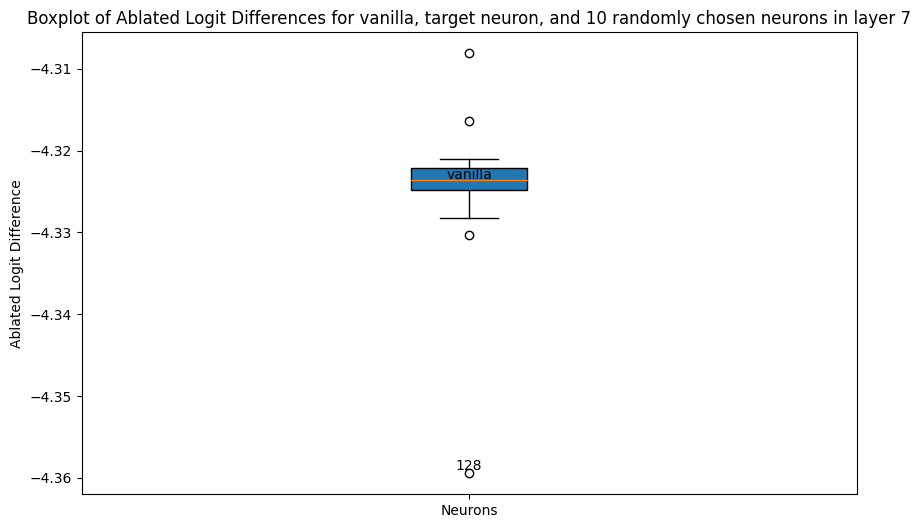

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Extracting values for the boxplot
values = list(neuron_values.values())

# Creating a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(values, patch_artist=True)

for i, val in enumerate(values):
    key = keys[i]
    if key == 128 or key == 'vanilla':
        plt.text(1, val, str(keys[i]), ha='center', va='bottom')


# Adding title and labels
plt.title('Boxplot of Ablated Logit Differences for vanilla, target neuron, and 10 randomly chosen neurons in layer 7')
plt.ylabel('Ablated Logit Difference')
plt.xticks([1], ['Neurons'])

# Displaying the boxplot
plt.show()

# Save to figures folder as 

# Save as svg
plt.savefig('figures/cup_neuron_ablation_population.svg')

In [6]:
import plotly.graph_objs as go
import numpy as np


# Creating a list of keys (neuron indices) and corresponding values
keys = list(neuron_values.keys())
values = list(neuron_values.values())

# Creating a violin plot
fig = go.Figure(data=go.Violin(y=values, x=np.zeros(len(values)), 
                               text=keys, hoverinfo='text', 
                               points='all', box_visible=True, 
                               line_color='black', pointpos=0))

# Updating layout for better visualization
fig.update_layout(
    title='Violin Plot of Ablated Logit Differences with Neuron Indices',
    yaxis=dict(title='Ablated Logit Difference'),
    xaxis=dict(showticklabels=False, title='Neurons'),
    showlegend=False
)

# Show plot
fig.show()
